In [1]:
import MDAnalysis
from MDAnalysis import Universe
from MDAnalysis.tests.datafiles import PDB,XTC
import MDAnalysis.analysis
import MDAnalysis.analysis.rdf
from MDAnalysis.analysis.rdf import InterRDF
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
traj_n = 30

## 0.67

In [3]:
pdbf = "/storage/chem/mssnkt/CACO3/UNBIASED/CaCO3/0.67/conf.pdb"
traj_all = []
for i in range(0,traj_n+1):
    traj_all.append('/storage/chem/mssnkt/CACO3/UNBIASED/CaCO3/0.67/trajectory.' + str(i) + '.xtc') 
universe = Universe(pdbf,traj_all)

In [4]:
print(universe.trajectory)

<ChainReader ['trajectory.0.xtc', 'trajectory.1.xtc', 'trajectory.2.xtc', 'trajectory.3.xtc', 'trajectory.4.xtc', 'trajectory.5.xtc', 'trajectory.6.xtc', 'trajectory.7.xtc', 'trajectory.8.xtc', 'trajectory.9.xtc', 'trajectory.10.xtc', 'trajectory.11.xtc', 'trajectory.12.xtc', 'trajectory.13.xtc', 'trajectory.14.xtc', 'trajectory.15.xtc', 'trajectory.16.xtc', 'trajectory.17.xtc', 'trajectory.18.xtc', 'trajectory.19.xtc', 'trajectory.20.xtc', 'trajectory.21.xtc', 'trajectory.22.xtc', 'trajectory.23.xtc', 'trajectory.24.xtc', 'trajectory.25.xtc', 'trajectory.26.xtc', 'trajectory.27.xtc', 'trajectory.28.xtc', 'trajectory.29.xtc', 'trajectory.30.xtc'] with 344056 frames of 12310 atoms>


In [5]:
group_Ca = universe.select_atoms("name Ca")

In [6]:
group_Co = universe.select_atoms("name C4")

In [7]:
rdf = InterRDF(group_Ca, group_Co, nbins=200, range=(0.0,8.0))
rdf.run();

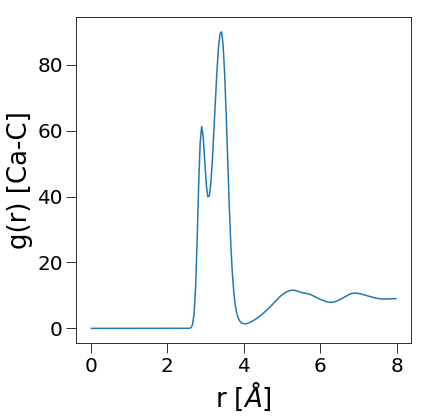

In [8]:
matplotlib.rcParams["figure.figsize"] = (6,6)
plt.plot(rdf.bins, rdf.rdf)
plt.tick_params(axis='both', which='both', length=10.0, labelleft='true', labelbottom='true', labelsize=20.0)
plt.xlabel('r [$\AA$]', fontsize=26)
plt.ylabel('g(r) [Ca-C]', fontsize=26)
plt.show()
#plt.savefig('foo.png')

In [9]:
xa = np.array(rdf.bins)
y1 = np.array(rdf.rdf)
data = np.array([xa, y1])
data = data.T
datafile_path = "/storage/chem/mssnkt/CACO3/UNBIASED/CaCO3/gdr_Ca_C.dat"
with open(datafile_path, 'wb') as datafile_id:
    np.savetxt(datafile_id, data, fmt=['%10.4f','%10.4f'])